# Pre-procesado de datos.

En este documento analizaremos los datos antes de entrenarlos.

Importamos las liberías empleadas en este análisis.

In [31]:
# Importamos las librerias necesarias.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Importamos nuestros datos.

In [32]:
# Creamos un DataFrame de nuestros datos.
car_data = pd.read_csv('../data/cars.csv', sep=';')

# Mostramos la forma y los primeros registros de nuestro DataFrame.
print(car_data.shape)
car_data.head()

(58049, 25)


,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,REV_Garantia,Averia_grave,QUEJA_CAC,EDAD_COCHE,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,NO DATA,Averia muy grave,SI,2.08,2892,0,0,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,SI,No,NO,2.45,1376,7187,0,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,NO DATA,No,NO,2.51,1376,0,1,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,SI,Averia muy grave,SI,2.43,2015,7256,1,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,NO DATA,No,NO,2.30,1818,0,1,3,21,3


Vemos qué valores nulos hay en nuestro DataFrame.

In [33]:
# Revisamos si hay valores nulos en nuestro DataFrame.
valores_nulos = car_data.isnull().sum()

# Mostramos los valores nulos.
valores_nulos

CODE                   0
PRODUCTO               0
TIPO_CARROCERIA        0
COMBUSTIBLE            0
Potencia_              0
TRANS                  0
FORMA_PAGO             0
ESTADO_CIVIL         890
GENERO               860
OcupaciOn              0
PROVINCIA              0
Campanna1              0
Campanna2              0
Campanna3              0
Zona _Renta        13178
REV_Garantia           0
Averia_grave           1
QUEJA_CAC              0
EDAD_COCHE             0
COSTE_VENTA            0
km_anno                0
Mas_1_coche            0
Revisiones             0
Edad Cliente           0
Tiempo                 0
dtype: int64

Debido a que las columnas con datos nulos son categóricas y pueden tomar tan solo ciertos valores, sustituimos los valores nulos por la moda.

In [34]:
# Sustituir valores nulos por la moda (valor más frecuente)
car_data['ESTADO_CIVIL'].fillna(car_data['ESTADO_CIVIL'].mode()[0], inplace=True)
car_data['GENERO'].fillna(car_data['GENERO'].mode()[0], inplace=True)
car_data['Zona _Renta'].fillna(car_data['Zona _Renta'].mode()[0], inplace=True)
car_data['Averia_grave'].fillna(car_data['Averia_grave'].mode()[0], inplace=True)

Verificamos que se hayan hecho los cambios correctamente.

In [35]:
# Calculamos de nuevo los valores nulos en nuestro DataFrame.
valores_nulos = car_data.isnull().sum()

# Mostramos los valores nulos.
valores_nulos

CODE               0
PRODUCTO           0
TIPO_CARROCERIA    0
COMBUSTIBLE        0
Potencia_          0
TRANS              0
FORMA_PAGO         0
ESTADO_CIVIL       0
GENERO             0
OcupaciOn          0
PROVINCIA          0
Campanna1          0
Campanna2          0
Campanna3          0
Zona _Renta        0
REV_Garantia       0
Averia_grave       0
QUEJA_CAC          0
EDAD_COCHE         0
COSTE_VENTA        0
km_anno            0
Mas_1_coche        0
Revisiones         0
Edad Cliente       0
Tiempo             0
dtype: int64

Ya no tenemos ningún dato nulo.

Vemos si hay datos duplicados., pues es un paso crucial para garantizar la calidad de los datos y evitar sesgos, errores en los resultados estadísticos, y problemas en los modelos predictivos. 

In [36]:
# Revisamos si hay valores duplicados en nuestro DataFrame.
duplicados = car_data.duplicated().sum()

# Mostramos los valores duplicados.
duplicados

0

Revisamos qué tipos de datos tiene cada columna de nuestro DataFrame.

In [37]:
# Revisamos los tipos de datos de nuestro DataFrame.
tipos_de_datos = car_data.dtypes

# Mostramos los tipos de datos.
tipos_de_datos

CODE                object
PRODUCTO            object
TIPO_CARROCERIA     object
COMBUSTIBLE         object
Potencia_           object
TRANS               object
FORMA_PAGO          object
ESTADO_CIVIL        object
GENERO              object
OcupaciOn           object
PROVINCIA           object
Campanna1           object
Campanna2           object
Campanna3           object
Zona _Renta         object
REV_Garantia        object
Averia_grave        object
QUEJA_CAC           object
EDAD_COCHE         float64
COSTE_VENTA          int64
km_anno              int64
Mas_1_coche          int64
Revisiones           int64
Edad Cliente         int64
Tiempo               int64
dtype: object

Para continuar con nuestro análisis separamos en variables categóricas y variables numéricas.

In [38]:
# Separamos las variables categóricas y numéricas.
categorical = car_data.select_dtypes(include=['object'])
numeric = car_data.select_dtypes(exclude=['object']) # Excluimos las variables categóricas ya que sabemos que el resto de las variables son numéricas.

## Análisis varables numéricas.

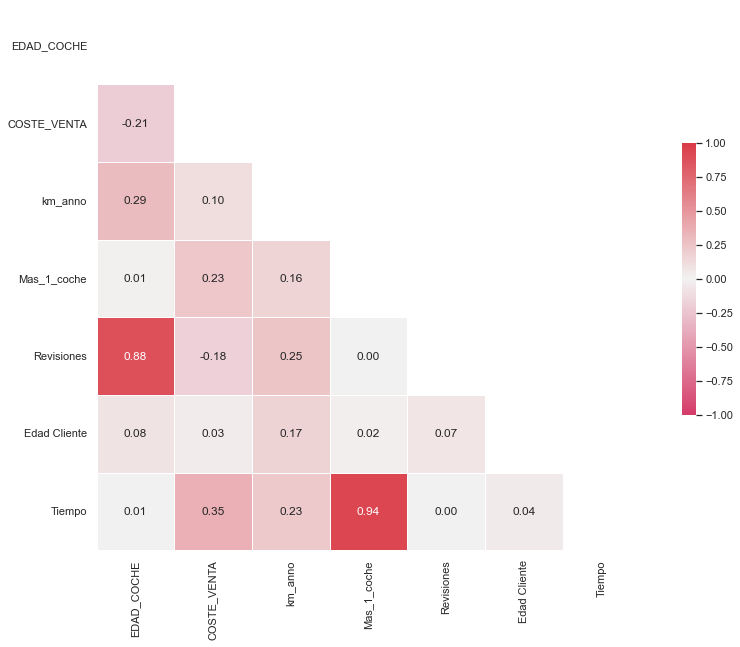

In [39]:
# Calcular la matriz de correlación
correlation_matrix = numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(15, 10))
sns.set(style='white')

# Crear la máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear el mapa de calor con los valores de correlación anotados
cmap = sns.diverging_palette(0, 10, as_cmap=True)

sns.heatmap(correlation_matrix, 
            mask=mask, 
            cmap=cmap, 
            annot=True,  # Mostrar los números
            fmt=".2f",  # Formato de los números a dos decimales
            vmin=-1, vmax=1, center=0, 
            square=True, 
            linewidths=0.5, 
            cbar_kws={"shrink": 0.5})

# Mostrar el gráfico
plt.show()

Podemos eliminar la variable `EDAD_COCHE` ya que las únicas correlaciones altas que tiene es con el número de revisiones y los kilómetros por año, lo cual es de sentido común, pues cuanto más años tiene un coche, más revisiones y kilómetros tiene.

También eliminamos la variable `Tiempo`.

In [40]:
# Eliminamos las columnas 'EDAD_COCHE' y 'Tiempo' del DataFrame.
car_data = car_data.drop(['EDAD_COCHE', 'Tiempo'], axis=1)

# También eliminamos las columnas 'EDAD_COCHE' y 'Tiempo' de la lista de variables numéricas.
numeric = numeric.drop(['EDAD_COCHE', 'Tiempo'], axis=1)

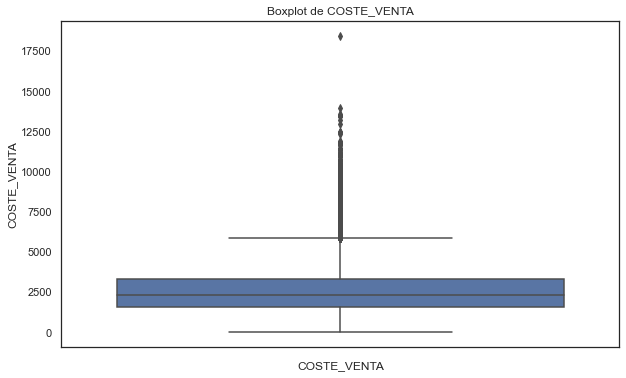

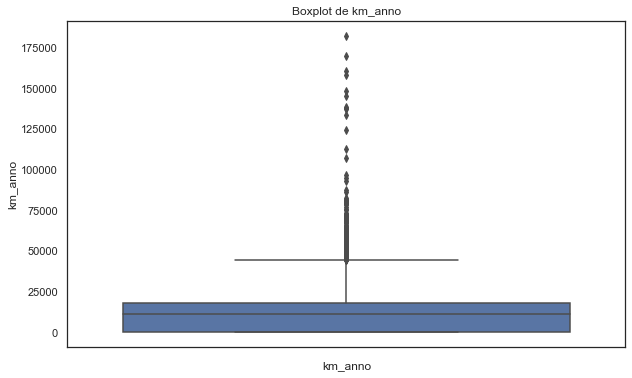

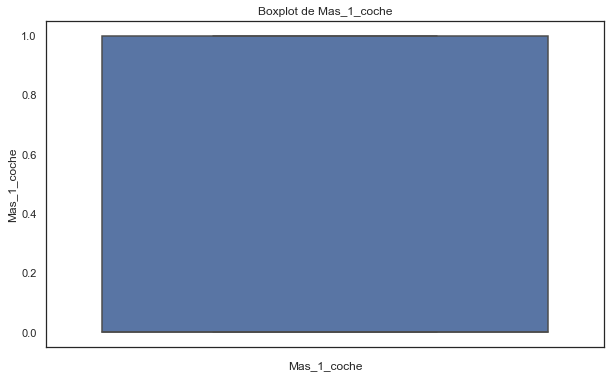

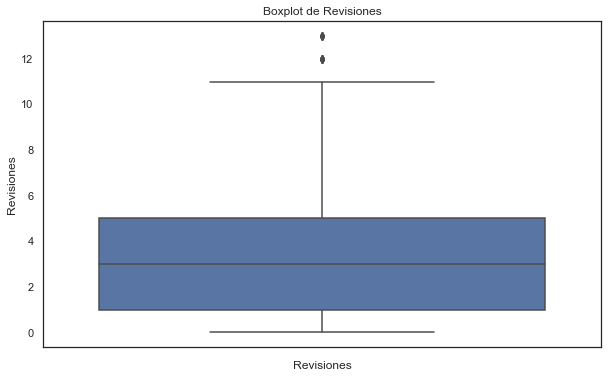

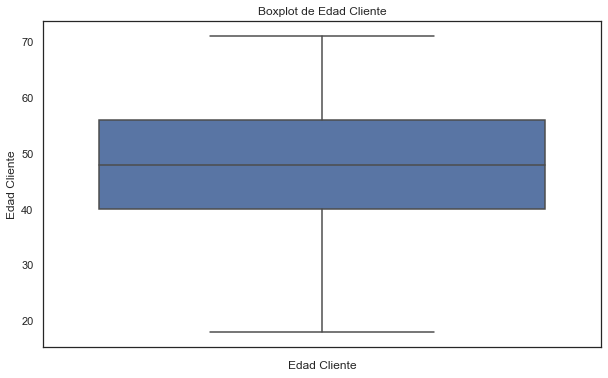

In [41]:
# Crear un boxplot individual para cada columna numérica.
for column in numeric.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(y=numeric[column])
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
    plt.show()

*EDAD_COCHE*. Esta gráfica nos indica que la mayoría de los coches tiene entre 4 y 8 años de antigüedad, con una mediana de 6 años, y el rango total de edades oscila entre 1 y 10 años. No se observan datos atípicos o extremos en este boxplot.


*COSTE_VENTA*.

El rango intercuartilico se encuentra alrededor de 2,500 en términos de COSTE_VENTA, lo que sugiere que el 50% de los datos está concentrado en ese rango, posiblemente entre unos 2,000 y 3,000. La línea dentro de la caja marca la mediana del coste de venta, que está alrededor de los 2,500. Esto indica que la mitad de los datos tiene un coste de venta inferior a ese valor, y la otra mitad superior. Los bigotes se extienden hacia abajo y hacia arriba, lo que indica el rango de los valores que no son atípicos. En este caso, el bigote superior termina alrededor de 5,000, lo que sugiere que los valores por encima de esa cifra empiezan a considerarse atípicos o outliers. Hay muchos puntos por encima del bigote superior, lo que indica valores atípicos. Estos puntos representan coches cuyo coste es significativamente más alto que el resto. El valor más extremo parece estar cerca de 17,500, lo que indica que hay coches con un coste de venta muy alto en comparación con la mayoría. La dispersión de los datos es notable. Mientras que la mayoría de los valores se encuentran en un rango estrecho cerca de los 2,500, hay una cantidad considerable de valores atípicos por encima de los 5,000, lo que sugiere una gran variabilidad en los costes de venta, especialmente en el extremo superior.

Posibles soluciones:

(Eliminar outliers si son errores o irrelevantes.

Transformar los datos (log, raíz) para reducir el efecto de los outliers.

Agrupar en categorías si no necesitas tanta precisión en los valores.

Usar modelos robustos que manejen outliers de forma natural xgboost, random forest.)




*KM_ANNO*

Parece que la mayoría de los coches tienen un kilometraje anual entre 0 y algo por encima de 25,000 km al año. Esto sugiere que la mayoría de los vehículos no recorren distancias excesivamente largas en un año. La mediana parece estar alrededor de 15,000 km/año. Esto indica que la mitad de los coches recorren menos de este kilometraje anualmente, y la otra mitad recorre más. El bigote superior se extiende hasta un valor cercano a 30,000 km/año, lo que significa que este es el valor más alto considerado "normal" para el kilometraje anual de un coche. Existen muchos outliers por encima del bigote superior, algunos incluso muy alejados, lo que indica que hay coches que recorren un kilometraje anual extremadamente alto. El valor más extremo parece estar por encima de 175,000 km/año, lo cual es bastante inusual y sugiere que algunos vehículos recorren distancias considerablemente largas. La mayoría de los vehículos tienen un kilometraje anual concentrado en un rango relativamente bajo, pero hay una gran cantidad de valores atípicos, lo que muestra una alta dispersión en los extremos, especialmente hacia valores muy elevados de kilómetros recorridos al año.



*MAS_1_COCHE*  Es booleano así que no vale.


*REVISIONES*  La mayoría de los datos de "Revisiones" está concentrada entre 2 y 6, con una mediana de 4. Existen algunos valores inusualmente altos (12 y 13), que son considerados outliers en este conjunto de datos.


*EDAD CLIENTE*  La mayoría de las edades de los clientes están entre 40 y 60 años. La línea horizontal dentro de la caja indica la mediana, que parece estar cerca de 50 años. Esto significa que el 50% de los clientes tiene menos de 50 años y el otro 50% más de 50 años. Los bigotes muestran el rango de valores que no son considerados atípicos. El bigote inferior llega hasta cerca de 20 años, lo que indica que el cliente más joven está en esa edad. El bigote superior llega hasta alrededor de 70 años, lo que indica la edad del cliente más mayor dentro del rango normal. En este gráfico no hay puntos fuera de los bigotes, lo que indica que no hay valores atípicos (outliers) detectados en los datos. Los clientes tienen edades entre 20 y 70 años de forma bastante consistente.

## Análisis variables categóricas.

Pasamos a numéricos las columnas que son de tipo object usando onehot encoder.

In [42]:
# Almacenar las columnas categóricas en una variable
cols_categoricas = car_data.select_dtypes(include=['object']).columns

# Mostrar los valores únicos de las columnas categóricas
for col in cols_categoricas:
    print(f"Valores únicos en la columna '{col}':")
    print(car_data[col].unique())
    print()  # Salto de línea para mejor visualización

Valores únicos en la columna 'CODE':
['CLI1' 'CLI2' 'CLI3' ... 'CLI57952' 'CLI58038' 'CLI58048']

Valores únicos en la columna 'PRODUCTO':
['A' 'B' 'C' 'H' 'J' 'D' 'I' 'E' 'F' 'K' 'G']

Valores únicos en la columna 'TIPO_CARROCERIA':
['TIPO1' 'TIPO6' 'TIPO4' 'TIPO7' 'TIPO8' 'TIPO2' 'TIPO3' 'TIPO5']

Valores únicos en la columna 'COMBUSTIBLE':
['FUEL 1' 'FUEL 2']

Valores únicos en la columna 'Potencia_':
['Baja' 'Media' 'Alta']

Valores únicos en la columna 'TRANS':
['M' 'A']

Valores únicos en la columna 'FORMA_PAGO':
['Contado' 'Otros' 'Financiera Marca' 'Financiera Banco']

Valores únicos en la columna 'ESTADO_CIVIL':
['CASADO' 'SOLTERO' 'OTROS' 'EN PAREJA']

Valores únicos en la columna 'GENERO':
['M' 'F']

Valores únicos en la columna 'OcupaciOn':
['Empresa' 'Funcionario' 'Autonomo']

Valores únicos en la columna 'PROVINCIA':
['Asturias' 'Toledo' 'Lerida' 'Madrid' 'Santa Cruz de Tenerife'
 'Pontevedra' 'Lacoruna' 'Barcelona' 'Cordoba' 'Guipuzcua' 'Valladolid'
 'Castellon' 'Valenci

In [43]:
#Eliminamos las columnas

car_data = car_data.drop('CODE', axis=1)

car_data


,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna3,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad Cliente
0,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,Asturias,...,NO,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,0,2,18
1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,Toledo,...,NO,Medio-Bajo,SI,No,NO,1376,7187,0,2,53
2,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,Lerida,...,NO,Medio,NO DATA,No,NO,1376,0,1,4,21
3,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,Madrid,...,NO,Medio,SI,Averia muy grave,SI,2015,7256,1,4,48
4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,Santa Cruz de Tenerife,...,SI,Alto,NO DATA,No,NO,1818,0,1,3,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,F,TIPO3,FUEL 1,Alta,M,Contado,SOLTERO,F,Empresa,Madrid,...,NO,Alto,SI,Averia muy grave,SI,6832,12528,0,5,38
58045,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,Alicante,...,NO,Medio-Bajo,NO DATA,No,SI,0,22072,0,3,54
58046,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,Madrid,...,NO,Medio,NO DATA,No,NO,0,8352,0,8,63
58047,G,TIPO5,FUEL 2,Media,M,Contado,CASADO,M,Empresa,Zaragoza,...,NO,Medio-Bajo,NO DATA,No,NO,2786,10441,0,13,62


In [44]:

# Crear un diccionario para almacenar los mapeos de cada columna
mappings = {}

# Lista de columnas que usaremos con LabelEncoder (con pocas categorías)
cols_labelencoder = ['Potencia_', 'Zona _Renta', 'PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 
                     'TRANS', 'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 
                     'Campanna1', 'Campanna2', 'Campanna3', 'REV_Garantia', 
                     'QUEJA_CAC', 'Averia_grave']

# Aplicar LabelEncoder a cada columna en cols_labelencoder
for col in cols_labelencoder:
    le = LabelEncoder().fit(car_data[col])
    car_data[col] = le.transform(car_data[col].astype(str))  # Convertir valores a string para manejar NaNs
    mappings[col] = dict(zip(le.classes_, le.transform(le.classes_)))

# Mostrar los diccionarios de mapeo para cada columna
for col in cols_labelencoder:
    print(f"Mapeo de '{col}':", mappings[col])


Mapeo de 'Potencia_': {'Alta': 0, 'Baja': 1, 'Media': 2}
Mapeo de 'Zona _Renta': {'Alto': 0, 'Medio': 1, 'Medio-Bajo': 2, 'Otros': 3}
Mapeo de 'PRODUCTO': {'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10}
Mapeo de 'TIPO_CARROCERIA': {'TIPO1': 0, 'TIPO2': 1, 'TIPO3': 2, 'TIPO4': 3, 'TIPO5': 4, 'TIPO6': 5, 'TIPO7': 6, 'TIPO8': 7}
Mapeo de 'COMBUSTIBLE': {'FUEL 1': 0, 'FUEL 2': 1}
Mapeo de 'TRANS': {'A': 0, 'M': 1}
Mapeo de 'FORMA_PAGO': {'Contado': 0, 'Financiera Banco': 1, 'Financiera Marca': 2, 'Otros': 3}
Mapeo de 'ESTADO_CIVIL': {'CASADO': 0, 'EN PAREJA': 1, 'OTROS': 2, 'SOLTERO': 3}
Mapeo de 'GENERO': {'F': 0, 'M': 1}
Mapeo de 'OcupaciOn': {'Autonomo': 0, 'Empresa': 1, 'Funcionario': 2}
Mapeo de 'Campanna1': {'NO': 0, 'SI': 1}
Mapeo de 'Campanna2': {'NO': 0, 'SI': 1}
Mapeo de 'Campanna3': {'NO': 0, 'SI': 1}
Mapeo de 'REV_Garantia': {'NO DATA': 0, 'SI': 1}
Mapeo de 'QUEJA_CAC': {'NO': 0, 'SI': 1}
Mapeo de 'Averia_grave': {'Averia grave': 0, 'Av

Identificamos putliers de 2 maneras: IQR y Z-score.

Método IQR: Los valores fuera del rango [𝑄1 − 1.5 × 𝐼𝑄𝑅, 𝑄3 + 1.5 × 𝐼𝑄𝑅] se consideran outliers.
Método Z-score: Los valores con un z-score absoluto mayor a 3 se consideran outliers (a más de 3 desviaciones estándar de la media).

In [45]:
# Calcular el IQR para identificar outliers
Q1 = car_data.quantile(0.25)  # Primer cuartil (25%)
Q3 = car_data.quantile(0.75)  # Tercer cuartil (75%)
IQR = Q3 - Q1           # Rango intercuartílico

# Definir los límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Encontrar los outliers
outliers = (car_data < lower_bound) | (car_data > upper_bound)

# Mostrar las filas que contienen outliers
print(car_data[outliers.any(axis=1)])

       PRODUCTO  TIPO_CARROCERIA  COMBUSTIBLE  Potencia_  TRANS  FORMA_PAGO  \
4             0                0            0          1      1           2   
10            0                0            0          1      1           2   
12            0                0            0          1      1           3   
13            0                0            0          1      1           3   
14            0                0            0          1      1           0   
...         ...              ...          ...        ...    ...         ...   
58044         5                2            0          0      1           0   
58045        10                6            0          0      0           0   
58046        10                6            0          0      0           0   
58047         6                4            1          2      1           0   
58048         6                4            1          2      1           0   

       ESTADO_CIVIL  GENERO  OcupaciOn             

C:\Users\Laura Rodríguez\AppData\Local\Temp\ipykernel_22104\2927218837.py:11: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (car_data < lower_bound) | (car_data > upper_bound)


In [46]:
# Calcular los z-scores
z_scores = stats.zscore(car_data)

# Identificar los outliers (z-score > 3 o z-score < -3)
outliers_z = (abs(z_scores) > 3)

# Mostrar las filas que contienen outliers
print(car_data[outliers_z.any(axis=1)])

TypeError: unsupported operand type(s) for /: 'str' and 'int'